In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

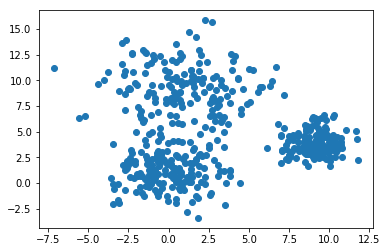

In [2]:
np.random.seed(10)
# number of samples
n = 1000
# dimensions/features
d = 2
# number of components in the GMM
k = 3
# random init for means and covariances of the components
means = np.zeros((k, d, 1))
covs = np.zeros((k, d, d))
for i in range(k):
    means[i] = np.random.randint(low = 0, high = 10, size = (d, 1))
    covs[i] = np.random.randint(low = 1, high = 7) * np.eye(d)
data = np.zeros((n, d))
# remember which component generated each point
w_true = np.zeros((n, ))
for i in range(n):
    z = np.random.choice(k)
    w_true[i] = z
    data[i] = np.random.multivariate_normal(means[z].squeeze(), covs[z], 1)
plt.figure()
plt.scatter(data[:500, 0], data[:500, 1])
# fit GMM to this data
X = data

In [3]:
means

array([[[9.],
        [4.]],

       [[1.],
        [9.]],

       [[0.],
        [1.]]])

In [4]:
covs

array([[[1., 0.],
        [0., 1.]],

       [[6., 0.],
        [0., 6.]],

       [[3., 0.],
        [0., 3.]]])

In [30]:
n, d = X.shape
# uniformly init posteriors
# w = (1/k) * np.ones((n, k))
# random non-uniform init for posteriors
w = np.random.randint(low = 1, high = 10, size = (n, k)).astype('float64')
w = w / np.sum(w, axis = 1)[:, None]
# priors
p = np.mean(w, axis = 0)
# ML estimate of the means and covariances based on the init posteriors
m = np.matmul(w.T, X) / np.matmul(w.T, np.ones((n, 1)))
S = np.zeros((k, d, d))
for i in range(k):
    S[i] = (1/np.sum(w[:, i])) * np.matmul((w[:, i, None]*(X - m[i])).T, (X - m[i]))

In [24]:
p

array([0.32398164, 0.35010349, 0.32591487])

In [25]:
m

array([[3.36217386, 4.72774256],
       [3.36397109, 4.75689227],
       [3.39337524, 4.90842274]])

In [26]:
S

array([[[19.48669284, -1.05591475],
        [-1.05591475, 14.05882399]],

       [[19.2838498 , -0.98198916],
        [-0.98198916, 14.85355028]],

       [[19.85857508, -1.57833073],
        [-1.57833073, 14.73226015]]])

In [31]:
n_iter = 100
LL = np.zeros((n_iter, ))
for e in range(n_iter):
    # update posteriors to get the lower bound of likelihood - E step
    log_likelihood = 0
    for i in range(n):
        px = np.zeros((k))
        for j in range(k):
            px[j] = p[j] * st.multivariate_normal.pdf(X[i], m[j], S[j])
        w[i] = px / np.sum(px)
        log_likelihood += np.sum(w[i] * np.log(px / w[i]))
    LL[e] = log_likelihood
    # Maximize lower bound of likelihood - M step   
    p = np.mean(w, axis = 0)
    m = np.matmul(w.T, X) / np.matmul(w.T, np.ones((n, 1)))
    S = np.zeros((k, d, d))
    for j in range(k):
        S[j] = (1/np.sum(w[:, j])) * np.matmul((w[:, j, None]*(X - m[j])).T, (X - m[j]))

Text(0,0.5,'log likelihood')

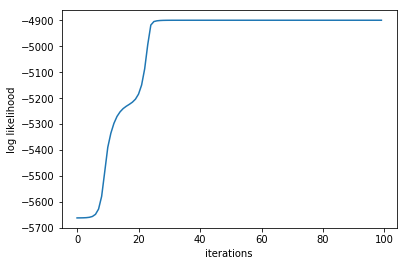

In [33]:
plt.figure()
plt.plot(LL)
plt.xlabel('iterations')
plt.ylabel('log likelihood')

In [19]:
# ML mean vectors
m

array([[9.07204579, 3.99632055],
       [1.04440345, 9.30081019],
       [0.13894225, 1.19138703]])

In [20]:
# ML covariance matrices
S

array([[[ 1.13273017e+00, -1.88942765e-04],
        [-1.88942765e-04,  1.14487588e+00]],

       [[ 6.29198454e+00, -6.55294593e-01],
        [-6.55294593e-01,  5.41496116e+00]],

       [[ 3.10483026e+00,  4.97316516e-02],
        [ 4.97316516e-02,  3.06246080e+00]]])

In [21]:
# posteriors w[i,j] - probability that point i was generated by component j
w

array([[9.99476924e-01, 5.04623577e-04, 1.84519246e-05],
       [5.10318937e-16, 9.88240832e-04, 9.99011759e-01],
       [2.77650681e-18, 9.62787714e-04, 9.99037212e-01],
       ...,
       [9.42959310e-09, 4.67129144e-01, 5.32870846e-01],
       [9.99876915e-01, 1.21397239e-04, 1.68756404e-06],
       [1.61145424e-14, 1.97924439e-02, 9.80207556e-01]])

In [22]:
# How accurately the model predicted the components from which the points were drawn
acc = np.argmax(w, axis = 1) == w_true
acc.astype('float64')
np.mean(acc)

0.982